CSCI 184 - Final Project
Project Title: ViralVibe - Classifying Song Popularity with ML
Team Members: Samantha Lee, Lydia Myla, and Camelia Siadat

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix

In [ ]:
import pandas as pd
data = pd.read_csv('/content/song_track.csv')
data

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39,0.00384,0.687,326240,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.962
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38,0.03290,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969
232722,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,47,0.90100,0.517,166960,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,4/4,0.813
232723,Soul,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,44,0.26200,0.745,222442,0.704,0.000000,A,0.3330,-7.137,Major,0.1460,100.031,4/4,0.489


In [ ]:
#Understanding the Popularity Column Better
data2 = data
print("Max Value of Popularity Column: ", data2['popularity'].max())
print("Min Value of Popularity Column: ", data2['popularity'].min())
print("Mean Value of Popularity Column: ", data2['popularity'].mean())

Max Value of Popularity Column:  100
Min Value of Popularity Column:  0
Mean Value of Popularity Column:  41.12750241701579


In [ ]:
data2 = data

#Sort Popularity Values into Bins
bins = [-1, 41, 100]

#A label of 0 is associated with a "Not Popular" song
#A label of 1 is associated with a "Popular" song
labels = [0, 1]

data2['popularity'] = pd.cut(data2['popularity'], bins = bins, labels=labels)
counts = data2.groupby('popularity').size()
print(counts)
data2


popularity
0    109598
1    123127
dtype: int64


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,0,0.24600,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,0,0.95200,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,0,0.95000,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,0,0.00384,0.687,326240,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.962
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,0,0.03290,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969
232722,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,1,0.90100,0.517,166960,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,4/4,0.813
232723,Soul,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,1,0.26200,0.745,222442,0.704,0.000000,A,0.3330,-7.137,Major,0.1460,100.031,4/4,0.489


In [ ]:
print("Column Names:")
print(data2.columns)
print("\n")
print("Data Types:")
print(data2.dtypes)

Column Names:
Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')


Data Types:
genre                 object
artist_name           object
track_name            object
track_id              object
popularity          category
acousticness         float64
danceability         float64
duration_ms            int64
energy               float64
instrumentalness     float64
key                   object
liveness             float64
loudness             float64
mode                  object
speechiness          float64
tempo                float64
time_signature        object
valence              float64
dtype: object


In [ ]:
columns = ['genre', 'artist_name', 'track_name', 'track_id', 'time_signature', 'mode', 'key']
data3 = data2.drop(columns, axis = 1)
data3

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0,0.61100,0.389,99373,0.910,0.000000,0.3460,-1.828,0.0525,166.969,0.814
1,0,0.24600,0.590,137373,0.737,0.000000,0.1510,-5.559,0.0868,174.003,0.816
2,0,0.95200,0.663,170267,0.131,0.000000,0.1030,-13.879,0.0362,99.488,0.368
3,0,0.70300,0.240,152427,0.326,0.000000,0.0985,-12.178,0.0395,171.758,0.227
4,0,0.95000,0.331,82625,0.225,0.123000,0.2020,-21.150,0.0456,140.576,0.390
...,...,...,...,...,...,...,...,...,...,...,...
232720,0,0.00384,0.687,326240,0.714,0.544000,0.0845,-10.626,0.0316,115.542,0.962
232721,0,0.03290,0.785,282447,0.683,0.000880,0.2370,-6.944,0.0337,113.830,0.969
232722,1,0.90100,0.517,166960,0.419,0.000000,0.0945,-8.282,0.1480,84.135,0.813
232723,1,0.26200,0.745,222442,0.704,0.000000,0.3330,-7.137,0.1460,100.031,0.489


In [ ]:
X = data3.drop(labels = 'popularity', axis = 1)
y = data3['popularity']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()


Random Forest Accuracy: 79.04%
Precision: 0.79
Recall: 0.79
F1 Score: 0.79
Confusion Matrix for Random Forest:
[[23990  8917]
 [ 5715 31196]]


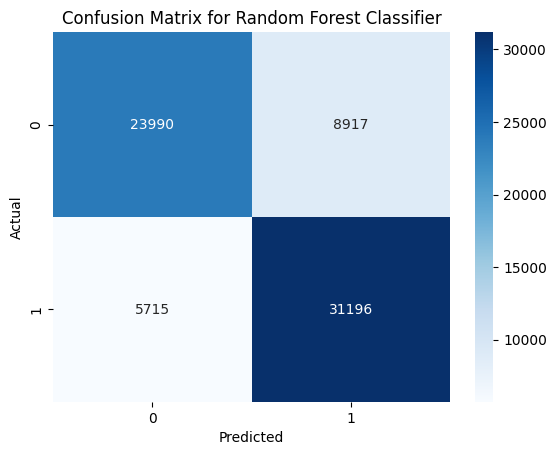

In [ ]:
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
print("\nRandom Forest Accuracy: %.2f%%" % (accuracy_rf * 100.0))
print("Precision: %.2f" % precision_rf)
print("Recall: %.2f" % recall_rf)
print("F1 Score: %.2f" % f1_rf)

print("Confusion Matrix for Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))

# Random Forest
plot_confusion_matrix(y_test, y_pred_rf, title='Confusion Matrix for Random Forest Classifier')


Decision Tree Accuracy: 74.59%
Precision: 0.75
Recall: 0.75
F1 Score: 0.74
Confusion Matrix for Decision Tree:
[[22661 10246]
 [ 7498 29413]]


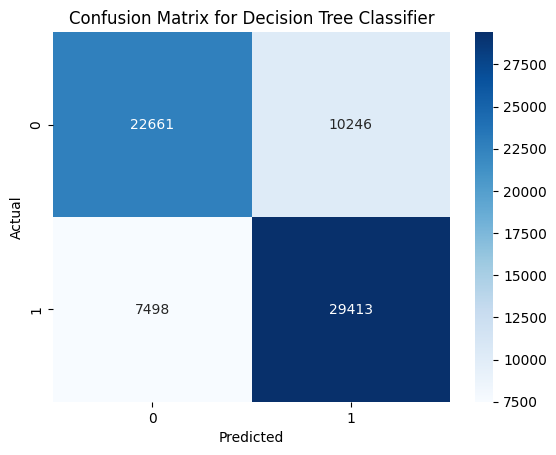

In [ ]:
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')
print("\nDecision Tree Accuracy: %.2f%%" % (accuracy_dt * 100.0))
print("Precision: %.2f" % precision_dt)
print("Recall: %.2f" % recall_dt)
print("F1 Score: %.2f" % f1_dt)


print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test, y_pred_dt))

# Decision Tree
plot_confusion_matrix(y_test, y_pred_dt, title='Confusion Matrix for Decision Tree Classifier')


XGBoost Accuracy: 74.59%
Precision: 0.75
Recall: 0.75
F1 Score: 0.74
Confusion Matrix for XGBoost:
[[21060 11847]
 [ 6018 30893]]


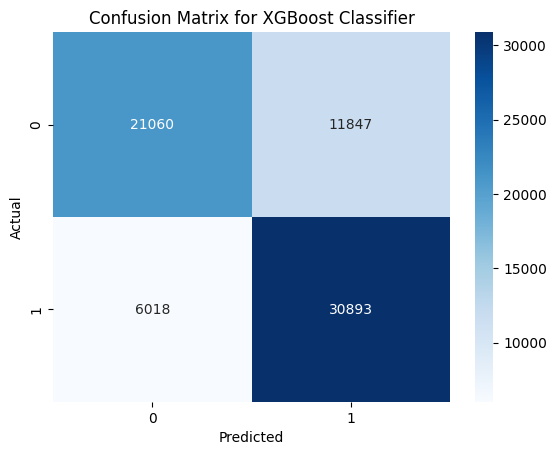

In [ ]:
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred_xg = model.predict(X_test)
predictions = [value for value in y_pred_xg]

accuracy_xg = accuracy_score(y_test, y_pred_dt)
precision_xg = precision_score(y_test, y_pred_dt, average='weighted')
recall_xg = recall_score(y_test, y_pred_dt, average='weighted')
f1_xg = f1_score(y_test, y_pred_dt, average='weighted')
print("\nXGBoost Accuracy: %.2f%%" % (accuracy_xg * 100.0))
print("Precision: %.2f" % precision_xg)
print("Recall: %.2f" % recall_xg)
print("F1 Score: %.2f" % f1_xg)


print("Confusion Matrix for XGBoost:")
print(confusion_matrix(y_test, y_pred_xg))

# XGBoost
plot_confusion_matrix(y_test, y_pred_xg, title='Confusion Matrix for XGBoost Classifier')

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SGD Optimizer with reduced learning rate
sgd = tf.keras.optimizers.SGD(learning_rate=0.01)

# Define the model with a more complex architecture
model = Sequential()
model.add(Dense(10, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Training and testing data
X = X_train_scaled
y = y_train
Xtst = X_test_scaled
ytst = y_test

print("SGD Metrics")

epochs = [5, 10, 15, 20, 25]
accuracySGD = []
precisionSGD = []
recallSGD = []
f1ScoreSGD = []

# Train the model and evaluate
for i in epochs:
    model.fit(X, y, epochs=i, validation_data=(Xtst, ytst), verbose=0)
    predY = (model.predict(Xtst) > 0.5).astype(int)
    accuracy = accuracy_score(ytst, predY)
    precision = precision_score(ytst, predY)
    recall = recall_score(ytst, predY)
    f1 = f1_score(ytst, predY)
    accuracySGD.append(accuracy)
    precisionSGD.append(precision)
    recallSGD.append(recall)
    f1ScoreSGD.append(f1)

print("Accuracies over epochs:", accuracySGD)
print("Precisions over epochs:", precisionSGD)
print("Recalls over epochs:", recallSGD)
print("F1 Scores over epochs:", f1ScoreSGD)

SGD Metrics
2182/2182 [==============================] - 3s 1ms/step
Accuracies over epochs: [0.7180526511787791, 0.7221203701051305, 0.7231516227906843, 0.7231229768827523, 0.7239107393508837]
Precisions over epochs: [0.6967156952311346, 0.7007567071772529, 0.703542486686733, 0.6994011161018102, 0.7040662824874447]
Recalls over epochs: [0.8264474005039149, 0.8279374712145431, 0.82322342933001, 0.8352794559887297, 0.824198748340603]
F1 Scores over epochs: [0.7560567569242209, 0.7590566436084996, 0.7586921511591616, 0.7613250527823391, 0.7594108836744883]


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Adam Optimizer with reduced learning rate
adam = tf.keras.optimizers.Adam(learning_rate=0.01)

# Define the model with a more complex architecture
model = Sequential()
model.add(Dense(10, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

# Training and testing data
X = X_train_scaled
y = y_train
Xtst = X_test_scaled
ytst = y_test

print("Adam Metrics")

epochs = [5, 10, 15, 20, 25]
accuracyAdam = []
precisionAdam = []
recallAdam = []
f1ScoreAdam = []

# Train the model and evaluate
for i in epochs:
    model.fit(X, y, epochs=i, validation_data=(Xtst, ytst), verbose=0)
    predY = (model.predict(Xtst) > 0.5).astype(int)
    accuracy = accuracy_score(ytst, predY)
    precision = precision_score(ytst, predY)
    recall = recall_score(ytst, predY)
    f1 = f1_score(ytst, predY)
    accuracyAdam.append(accuracy)
    precisionAdam.append(precision)
    recallAdam.append(recall)
    f1ScoreAdam.append(f1)

print("Accuracies over epochs:", accuracyAdam)
print("Precisions over epochs:", precisionAdam)
print("Recalls over epochs:", recallAdam)
print("F1 Scores over epochs:", f1ScoreAdam)

Adam Metrics
2182/2182 [==============================] - 3s 1ms/step
Accuracies over epochs: [0.7240253229826119, 0.7278638746455068, 0.7272479876249678, 0.7264172562949383, 0.7254003265633504]
Precisions over epochs: [0.7045565217391304, 0.7152298781513615, 0.6993039753714362, 0.7004276389826694, 0.7041264873075418]
Recalls over epochs: [0.8231692449405327, 0.8062637154235864, 0.8492590284738967, 0.8431091002682127, 0.8288856980303975]
F1 Scores over epochs: [0.7592583337498126, 0.7580234335201222, 0.7670210553360167, 0.7651737746032136, 0.7614295313705483]


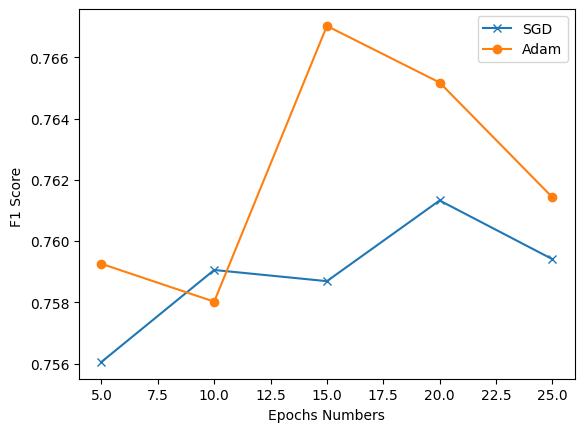

In [ ]:
# Plot SGD and Adam testing accuracy
plt.plot(epochs, f1ScoreSGD, marker='x')
plt.plot(epochs, f1ScoreAdam, marker='o')
plt.xlabel('Epochs Numbers')
plt.ylabel('F1 Score ')
plt.legend(['SGD', 'Adam'])
plt.show()